<a href="https://colab.research.google.com/github/TVAexe/KPDL-24-25/blob/main/M%C3%B4_h%C3%ACnh_d%E1%BB%B1_%C4%91o%C3%A1n_gi%E1%BB%9Bi_t%C3%ADnh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import datetime

class NaiveBayesGenderClassifier:
    def __init__(self, male_file, female_file):
        self.male_file = male_file
        self.female_file = female_file
        self.vectorizer = CountVectorizer(analyzer='char', ngram_range=(1, 4))
        self.model = MultinomialNB()

    def load_data(self):
        # Đọc dữ liệu từ file
        with open(self.male_file, 'r', encoding='utf-8') as file:
            male_names = [line.strip() for line in file.readlines()]

        with open(self.female_file, 'r', encoding='utf-8') as file:
            female_names = [line.strip() for line in file.readlines()]

        # Tạo DataFrame
        male_data = pd.DataFrame({'name': male_names, 'gender': 'Nam'})
        female_data = pd.DataFrame({'name': female_names, 'gender': 'Nu'})
        data = pd.concat([male_data, female_data]).reset_index(drop=True)

        # Gán nhãn số cho giới tính
        data['gender'] = data['gender'].apply(lambda x: 1 if x == 'Nam' else 0)
        return data

    def train(self):
        # Tải dữ liệu và mã hóa tên
        data = self.load_data()
        X = self.vectorizer.fit_transform(data['name'])
        y = data['gender']

        # Chia dữ liệu thành huấn luyện và kiểm thử
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

        # Huấn luyện mô hình Naive Bayes
        self.model.fit(X_train, y_train)

        # Đánh giá mô hình
        y_pred = self.model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f'Model Accuracy: {accuracy:.2f}')

    def predict_gender(self, name):
        # Dự đoán giới tính từ tên
        name_vectorized = self.vectorizer.transform([name])
        prediction = self.model.predict(name_vectorized)
        return 'Nam' if prediction[0] == 1 else 'Nu'


In [ ]:
import pandas as pd

# Đường dẫn tới file tên nam và nữ
male_file = '/content/drive/MyDrive/Tencontrai.txt'
female_file = '/content/drive/MyDrive/Tencongai.txt'

# Đường dẫn tới file ngân hàng
bidv = '/content/drive/MyDrive/bidv1.xlsx'
vcb = '/content/drive/MyDrive/vcb_1-30.csv'
viettin1 = '/content/drive/MyDrive/viettin-10.9-15.9.2024.xlsx'
viettin2 = '/content/drive/MyDrive/16.9-29.9.2024.xlsx'

# Tạo đối tượng NaiveBayesGenderClassifier và huấn luyện mô hình
classifier = NaiveBayesGenderClassifier(male_file, female_file)
classifier.train()

# Đọc dữ liệu từ các file
df_bidv = pd.read_excel(bidv, engine='openpyxl')
tp1 = df_bidv['Tên']

df_viettin1 = pd.read_excel(viettin1, engine='openpyxl')
tp2 = df_viettin1['ten_doi_xung']

df_viettin2 = pd.read_excel(viettin2, engine='openpyxl')
tp3 = df_viettin2['Tên đối ứng']

df_vcb = pd.read_csv(vcb)
tp4 = df_vcb['Người gửi']

# Kết hợp các tên từ các cột thành một chuỗi duy nhất
tp = pd.concat([tp1, tp2, tp3, tp4], ignore_index=True)

tp_viettin= pd.concat([tp2, tp3], ignore_index=True)




Model Accuracy: 0.83


In [ ]:
result = []
for name in tp:
    if pd.isna(name) or name == "" or isinstance(name, (int, float)): # Check if name is numeric
        result.append("unknown")
    else:
        gender = classifier.predict_gender(str(name)) # Convert name to string before prediction
        result.append(gender if gender is not None else "unknown")

result1=[]
for name in tp1:
    if pd.isna(name) or name == "" or isinstance(name, (int, float)): # Check if name is numeric
        result1.append("unknown") # Append to result1 instead of result
    else:
        gender = classifier.predict_gender(str(name)) # Convert name to string before prediction
        result1.append(gender if gender is not None else "unknown") # Append to result1 instead of result

result_viettin=[]
for name in tp_viettin:
    if pd.isna(name) or name == "" or isinstance(name, (int, float)): # Check if name is numeric
        result_viettin.append("unknown") # Append to result1 instead of result
    else:
        gender = classifier.predict_gender(str(name)) # Convert name to string before prediction
        result_viettin.append(gender if gender is not None else "unknown") # Append to result1 instead of result

result4=[]
for name in tp4:
    if pd.isna(name) or name == "" or isinstance(name, (int, float)): # Check if name is numeric
        result4.append("unknown") # Append to result4 instead of result
    else:
        gender = classifier.predict_gender(str(name)) # Convert name to string before prediction
        result4.append(gender if gender is not None else "unknown") # Append to result4 instead of result

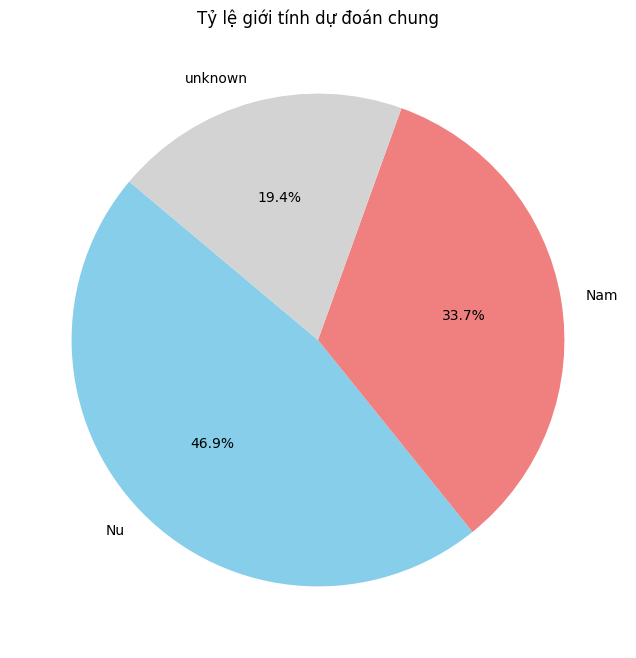

In [ ]:
result_chung = pd.DataFrame({'Tên': tp, 'Giới tính dự đoán': result})

result_bidv= pd.DataFrame({'Tên': tp1, 'Giới tính dự đoán': result1})
result_viettinbank= pd.DataFrame({'Tên': tp_viettin, 'Giới tính dự đoán': result_viettin})

result_vcb= pd.DataFrame({'Tên': tp4, 'Giới tính dự đoán': result4})
import matplotlib.pyplot as plt

# Tính toán số lượng mỗi giới tính
gender_counts = result_chung['Giới tính dự đoán'].value_counts()

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral', 'lightgrey'])
plt.title('Tỷ lệ giới tính dự đoán chung')
plt.show()

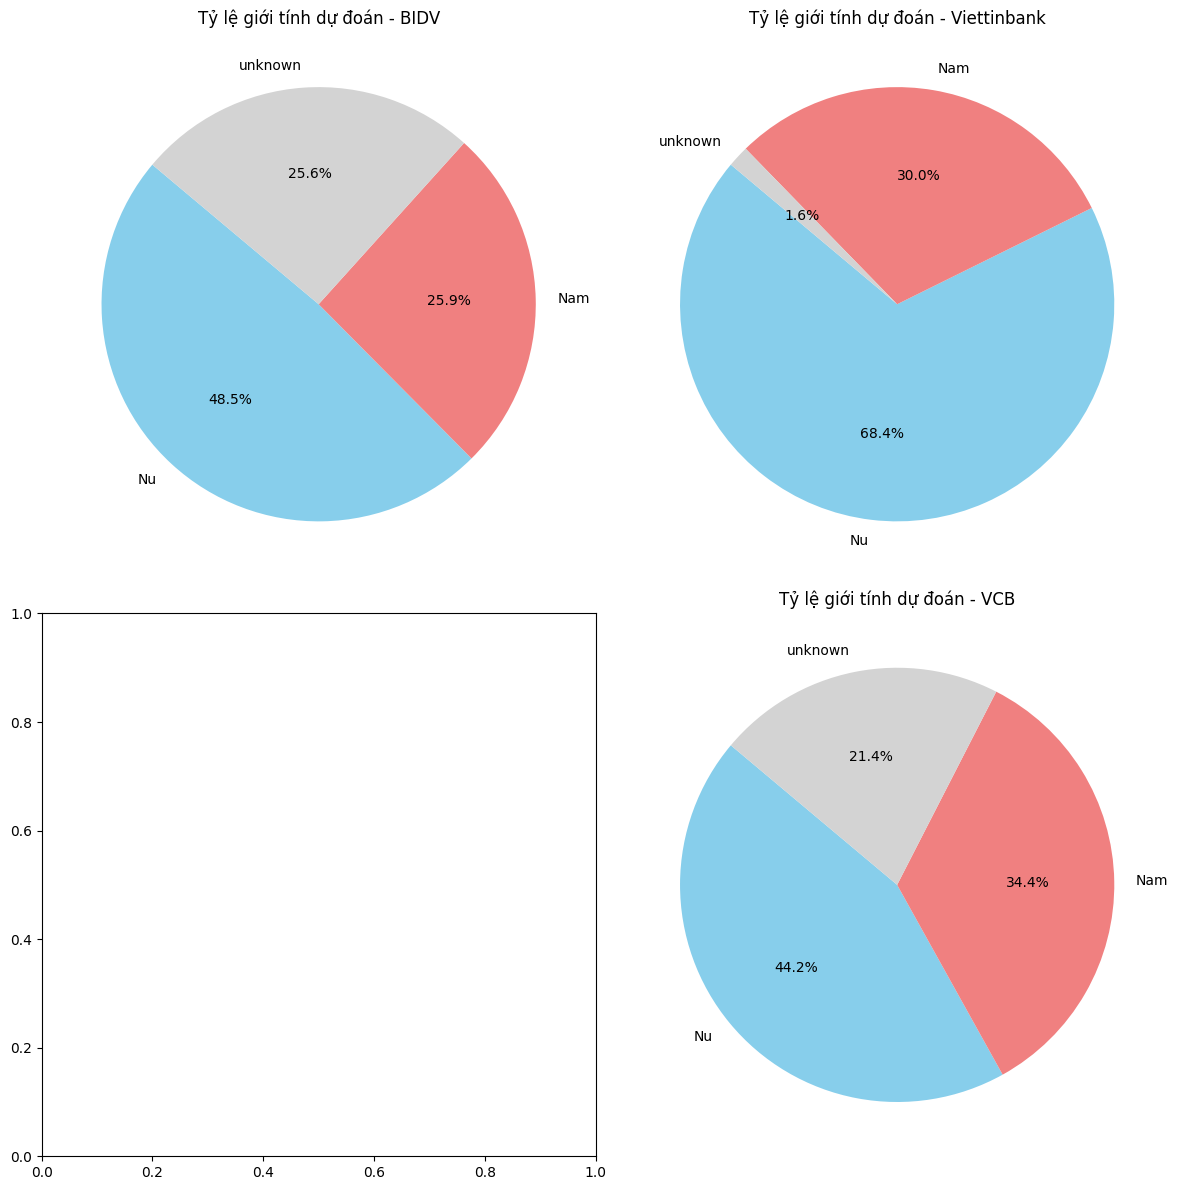

In [ ]:
import matplotlib.pyplot as plt

# Tính toán số lượng mỗi giới tính trong từng DataFrame
gender_counts_bidv = result_bidv['Giới tính dự đoán'].value_counts()
gender_counts_viettin1 = result_viettinbank['Giới tính dự đoán'].value_counts()
gender_counts_vcb = result_vcb['Giới tính dự đoán'].value_counts()

# Thiết lập kích thước cho biểu đồ
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Vẽ biểu đồ tròn cho BIDV
axes[0, 0].pie(gender_counts_bidv, labels=gender_counts_bidv.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral', 'lightgrey'])
axes[0, 0].set_title('Tỷ lệ giới tính dự đoán - BIDV')

# Vẽ biểu đồ tròn cho Viettin1
axes[0, 1].pie(gender_counts_viettin1, labels=gender_counts_viettin1.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral', 'lightgrey'])
axes[0, 1].set_title('Tỷ lệ giới tính dự đoán - Viettinbank')

#

# Vẽ biểu đồ tròn cho VCB
axes[1, 1].pie(gender_counts_vcb, labels=gender_counts_vcb.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral', 'lightgrey'])
axes[1, 1].set_title('Tỷ lệ giới tính dự đoán - VCB')

# Hiển thị tất cả các biểu đồ
plt.tight_layout()
plt.show()
